# MU4MEF04 ‚ÄìM√©thodes Num√©riques pour les √©coulements incompressibles- S1


## TP1 Approximation par diff√©rences finies

### Master SPI ‚Äì MSH
#### ZHOU Zixin 28609845

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from numpy import polyfit 
import math

On consid√®re
$$
f(x)=200 e^{-20 x} \sin (20 \pi x)
$$

sur [0, 1].

### 1.Repr√©senter f sur une grille r√©guli√®re de N=101 points.

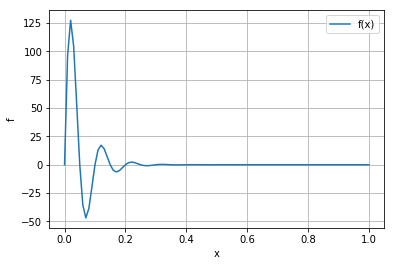

In [2]:
n      = 101
x      = np.linspace(0,1,n)
f      = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.grid()
plt.plot(x,f,label="f(x)")
#plt.title("F en fonction de x sur une grille r√©guli√®re de 101 points")
plt.legend() 
plt.show()

### 2.Calculer par diff√©rences finies centr√©es la d√©riv√©e de $f$ sur la grille. Pour obtenir une diff√©rence centr√©e aux bornes on extrapolera √† l‚Äôext√©rieur de l‚Äôintervalle [0, 1]. Comparer avec la d√©riv√©e exacte $f^{\prime}$. Calculer l‚Äôerreur d‚Äôapproximation $e_{L^{ 2}}$.

On utilisera 
$$
f^{\prime}(x_{i}) \sim \frac{f(x_{i+1})-f(x_{i-1})}{2 \Delta x}
$$

$$
e_{L^{ 2}}=\left[ \frac{1}{N}\Sigma_{i}^{N} \left|f^{\prime}(x_{i})_{DF}-f^{\prime}(x_{i})_{ Analytique}\right|^{2} \right]^{\frac{1}{2}}
$$

La d√©riv√©e exacte $f^{\prime}$ est :
$$
f^{\prime}=4000e^{-20x}(\pi cos(20\pi x)-sin(20\pi x))
$$

Pour N = 101, l'erreur d'approximation est 99.46980540906972


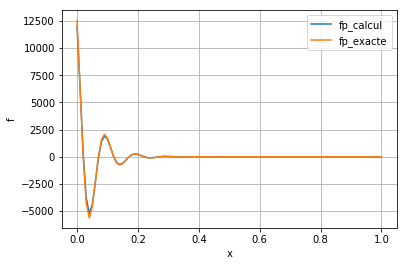

In [3]:
# Sch√©ma centr√©e

n      = 101
x      = np.linspace(0,1,n)
dx     = x[1]-x[0]                                      #La taille du maillage

fp_e   = 4000 * np.exp(-20 * x) * (math.pi * np.cos(20 * math.pi * x)-np.sin(20 * math.pi * x))         #La d√©riv√©e exacte
fp_c   = np.zeros(len(f))                               #La d√©riv√©e calcul√©e

erreur = []                                             #L‚Äôerreur d‚Äôapproximation
taille = []                                             #La taille de la grille

taille.append(dx)


for i in range(1,100):
    fp_c[i] = (f[i+1]-f[i-1])/(2*dx)
    
    
#Extrapolation √† l'ext√©rieur de l'intervalle

f_g      = 200 * np.exp(-20 * (-dx)) * (np.sin(20 * math.pi * (-dx)))     
f_d      = 200 * np.exp(-20 * (1+dx)) * (np.sin(20 * math.pi * (1 + dx)))
fp_c[0]  = (f[1] - f_g)/(2 * dx)
fp_c[-1] = (f_d - f[-2])/(2 * dx)


#Erreur d'approximation

e = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))
erreur.append(e)

print "Pour N = 101, l'erreur d'approximation est", e

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.grid()
plt.plot(x,fp_c,label="fp_calcul")
plt.plot(x,fp_e,label="fp_exacte")
plt.legend() 
plt.show()    

### 3. Recommencer avec N = 500, N = 1000, N = 2000 ...

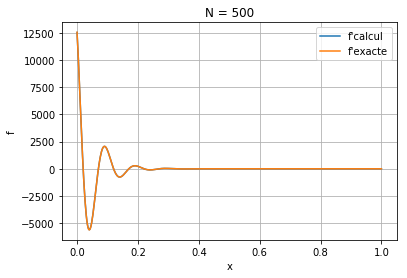

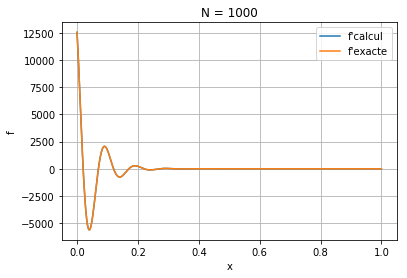

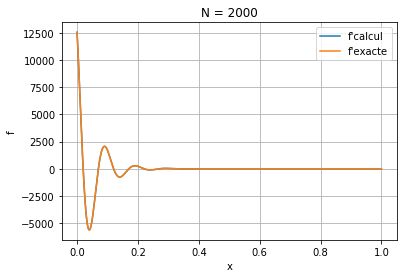

Pour N = 500, l'erreur d'approximation est 3.65834439254792
Pour N = 1000, l'erreur d'approximation est 0.9030893371941189
Pour N = 2000, l'erreur d'approximation est 0.22436185084245225


In [4]:

# N = 500,1000,2000

for n in [500,1000,2000]:
    x    = np.linspace(0,1,n)
    f    = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))
    fp_e = 4000 * np.exp(-20 * x) * (math.pi * np.cos(20 * math.pi * x) - np.sin(20 * math.pi * x))
    
    dx   = x[1] - x[0]
    taille.append(dx)
    fp_c = np.zeros(len(f))

    for i in range(1,n-1):
        fp_c[i] = (f[i+1] - f[i-1])/(2 * dx)
        
    f_g      = 200 * np.exp(-20 * (-dx)) * (np.sin(20 * math.pi * (-dx)))
    f_d      = 200 * np.exp(-20 * (1 + dx)) * (np.sin(20 * math.pi * (1 + dx)))
    fp_c[0]  = (f[1] - f_g)/(2 * dx)
    fp_c[-1] = (f_d - f[-2])/(2 * dx)

    e = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))
    erreur.append(e)
    
    plt.figure()
    plt.title("N = %d" %n)
    plt.xlabel("x")
    plt.ylabel("f")
    plt.grid()
    plt.plot(x,fp_c,label="f'calcul")
    plt.plot(x,fp_e,label="f'exacte")
    plt.legend() 
    plt.show()
    
print "Pour N = 500, l'erreur d'approximation est", erreur[1]    
print "Pour N = 1000, l'erreur d'approximation est", erreur[2] 
print "Pour N = 2000, l'erreur d'approximation est", erreur[3]     

### 4. Repr√©senter l‚Äôerreur en fonction de la taille de la grille. Quel est l‚Äôordre de la m√©thode d‚Äôapproximation?

Pour avoir l'order de cette m√©thode d‚Äôapproximation, on a besion de tracer la courbe $log(\Delta x)$ en fonction de $log(erreur)$

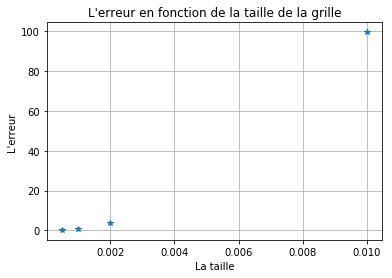

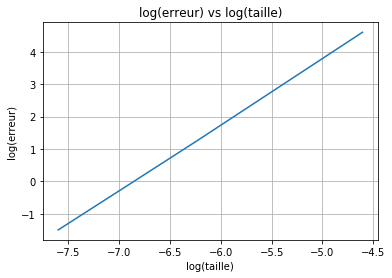

La pente de la courbe est  2.036100340000653


In [5]:
# L‚Äôerreur en fonction de la taille de la grille

plt.figure()
plt.title("L'erreur en fonction de la taille de la grille")
plt.xlabel("La taille")
plt.ylabel("L'erreur")
plt.grid()
plt.plot(taille,erreur,"*")
plt.show() 


# ùëôùëúùëî(Œîùë•) vs ùëôùëúùëî(ùëíùëüùëüùëíùë¢ùëü)
plt.figure()
plt.title("log(erreur) vs log(taille)")
plt.xlabel("log(taille)")
plt.ylabel("log(erreur)")
plt.grid()
plt.plot(np.log(taille),np.log(erreur))
plt.show() 


parameter = np.polyfit(np.log(taille), np.log(erreur), 1)
print"La pente de la courbe est ", parameter[0]

Donc, l'ordre de cette m√©thode d'approximation est 2. Cette valeur est en coh√©rence avec la valeur th√©orie.

### 5.  Recommencer avec un sch√©ma d√©centr√© amont (extrapoler lorsque c‚Äôest n√©cessaire). Comparer avec la solution analytique $f^{\prime}$ (calculer l‚Äôerreur). Quel est l‚Äôordre de la m√©thode d‚Äôapproximation?

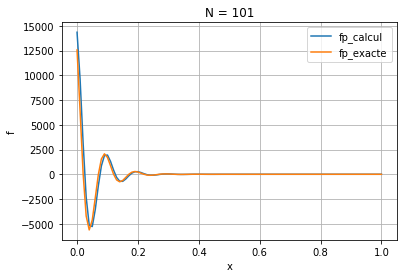

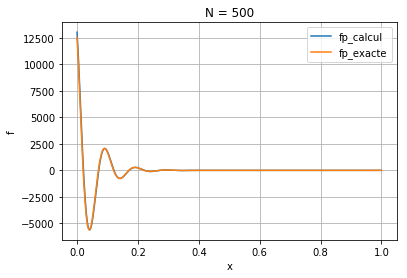

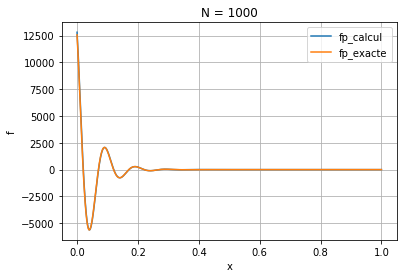

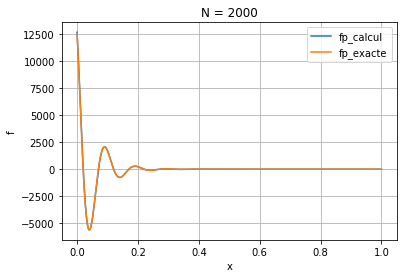

Pour N = 101, l'erreur d'approximation est 557.9557015140151
Pour N = 500, l'erreur d'approximation est 110.2590069032242
Pour N = 1000, l'erreur d'approximation est 54.685233004752774
Pour N = 2000, l'erreur d'approximation est 27.219518727627193


In [6]:
# Sch√©ma d√©centr√© amont

erreur = []
taille = []


for n in [101,500,1000,2000]:
    x    = np.linspace(0,1,n)
    f    = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))
    fp_e = 4000 * np.exp(-20 * x) * (math.pi * np.cos(20 * math.pi * x)-np.sin(20 * math.pi * x))
    
    dx   = x[1] - x[0]
    taille.append(dx)
    fp_c = np.zeros(len(f))

    for i in range(1,n-1):
        fp_c[i] = (f[i] - f[i-1])/(dx)
        
    f_g      = 200 * np.exp(-20 * (-dx)) * (np.sin(20 * math.pi * (-dx)))
    fp_c[0]  = (f[0]-f_g)/(dx)

    e = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))
    erreur.append(e)
    
    plt.figure()
    plt.title("N = %d" %n)
    plt.xlabel("x")
    plt.ylabel("f")
    plt.grid()
    plt.plot(x,fp_c,label="fp_calcul")
    plt.plot(x,fp_e,label="fp_exacte")
    plt.legend() 
    plt.show()
    
print "Pour N = 101, l'erreur d'approximation est", erreur[0]   
print "Pour N = 500, l'erreur d'approximation est", erreur[1]    
print "Pour N = 1000, l'erreur d'approximation est", erreur[2] 
print "Pour N = 2000, l'erreur d'approximation est", erreur[3] 


<Figure size 432x288 with 0 Axes>

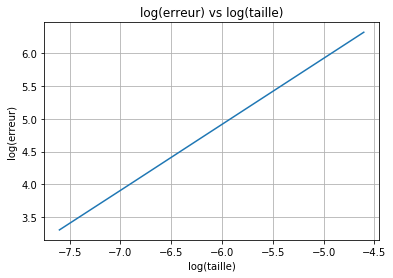

La pente de la courbe est  1.0085818836321605


In [7]:
# log(erreur) en fonction de log(taille de la grille)

plt.figure()
plt.figure()
plt.title("log(erreur) vs log(taille)")
plt.xlabel("log(taille)")
plt.ylabel("log(erreur)")
plt.grid()
plt.plot(np.log(taille),np.log(erreur))
plt.show() 


parameter = np.polyfit(np.log(taille), np.log(erreur), 1)
print"La pente de la courbe est ", parameter[0]

Donc, l'ordre de cette m√©thode d'approximation est 1. Cette valeur est en coh√©rence avec la valeur th√©orie.

### 6. Le maillage r√©gulier est-il adapt√©? Justifier votre r√©ponse. Discr√©tiser et calculer la d√©riv√©e de la fonction $f$ en utilisant un maillage irr√©gulier du type $y = (1 ‚àí tanh((1 ‚àí x)a))/ tanh(a)$. Prendre $a=3$. Pouvez vous diminuer le nombre de points du maillage en obtenant une bonne approximation de la fonction et de sa d√©riv√©e?

Le maillage r√©gulier n'est pas adapt√© dans ce cas.
On observe que le d√©riv√© de la fonction f(x) a une grande variation quand x est inf√©rieur √† 0.2. Lorsque x est sup√©rieur √† 0.2 la variation devient tr√®s petite. Donc il est possible d'appliquer la m√©thode irr√©guli√®re en utilisant plus de points pour tracer la partie avec beaucoup de variation et moins de points pour la partie varie tr√®s peu. Cela nous permet d'avoir suffisamment de pr√©cision sur les deux parties de la courbe.

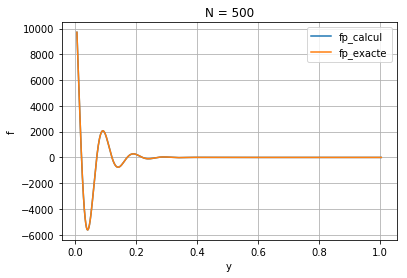

L'erreur d'approximation est 0.6227741917073057


In [8]:
# Sch√©ma centr√©e du maillage irr√©gulier quand N = 500

a        = 3
n        = 500

x        = np.linspace(0,1,n)
dx       = x[1] - x[0]
y        = (1 - np.tanh((1 - x) * a))/np.tanh(a)

f        = 200  * np.exp(-20 * y) * (np.sin(20 * math.pi * y))
fp_e     = 4000 * np.exp(-20 * y) * (math.pi * np.cos(20 * math.pi * y)-np.sin(20 * math.pi * y))

fp_c     = np.zeros(len(f))

for i in range(1,n-1):
    fp_c[i] = (f[i+1] - f[i-1])/(y[i+1] - y[i-1])
    
    
#Extrapolation √† l'ext√©reur de l'intervalle

y_g      =  (1 - np.tanh((1 - (0 - dx)) * a))/np.tanh(a)
y_d      =  (1 - np.tanh((1 - (1 + dx)) * a))/np.tanh(a)

f_g      = 200 * np.exp(- 20 * (y_g)) * (np.sin(20 * math.pi * (y_g)))
f_d      = 200 * np.exp(- 20 * (y_d)) * (np.sin(20 * math.pi * (y_d)))

fp_c[0]  = (f[1] - f_g)/(y[1] - y_g )
fp_c[-1] = (f_d - f[-2])/(y_d - y[-2])

e        = np.sqrt(dx * np.sum((np.abs(fp_c - fp_e) ** 2)))

plt.figure()
plt.title("N = %d" %n)
plt.xlabel("y")
plt.ylabel("f")
plt.grid()
plt.plot(y,fp_c,label="fp_calcul")
plt.plot(y,fp_e,label="fp_exacte")
plt.legend() 
plt.show()
    
print "L'erreur d'approximation est", e

On observe que pour N = 500, le maillage r√©gulier a une erreur d'approximation de 3.7 mais le maillage irr√©gulier a une erreur d'approximation de 0.6, bien plus petit que le maillage r√©gulier. Cela montre que le maillage irr√©gulier est plus adapt√© pour ce cas.
